In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
paciente='paciente2'

# Importar Arrays de Entrenamiento, Validación y Prueba

In [5]:
with open('dataset/generado/'+paciente+'/array_Xtrain_down_equals.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [6]:
len(array_Xtrain)

2343

In [7]:
with open('dataset/generado/'+paciente+'/array_Ytrain_down_equals.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [8]:
len(array_Ytrain)

2343

In [9]:
with open('dataset/generado/'+paciente+'/array_Xval_down_equals.npy', 'rb') as f:
    array_Xval = np.load(f)

In [10]:
len(array_Xval)

423

In [11]:
with open('dataset/generado/'+paciente+'/array_Yval_down_equals.npy', 'rb') as f:
    array_Yval = np.load(f)

In [12]:
len(array_Yval)

423

In [13]:
with open('dataset/generado/'+paciente+'/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [14]:
len(array_Xtest)

1742

In [15]:
with open('dataset/generado/'+paciente+'/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [16]:
len(array_Ytest)

1742

# Entrenamiento Vanilla LSTM con dropout

In [17]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [18]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/'+paciente+'/vanilla_dropout_balanceado.h5')

Epoch 1/50
74/74 [==============================] - 5s 18ms/step - loss: 0.0172 - mae: 0.1005 - mse: 0.0172 - val_loss: 0.0059 - val_mae: 0.0643 - val_mse: 0.0059
Epoch 2/50
74/74 [==============================] - 1s 15ms/step - loss: 0.0077 - mae: 0.0650 - mse: 0.0077 - val_loss: 0.0046 - val_mae: 0.0555 - val_mse: 0.0046
Epoch 3/50
74/74 [==============================] - 2s 23ms/step - loss: 0.0060 - mae: 0.0575 - mse: 0.0060 - val_loss: 0.0039 - val_mae: 0.0493 - val_mse: 0.0039
Epoch 4/50
74/74 [==============================] - 2s 26ms/step - loss: 0.0056 - mae: 0.0549 - mse: 0.0056 - val_loss: 0.0040 - val_mae: 0.0495 - val_mse: 0.0040
Epoch 5/50
74/74 [==============================] - 2s 26ms/step - loss: 0.0048 - mae: 0.0502 - mse: 0.0048 - val_loss: 0.0034 - val_mae: 0.0450 - val_mse: 0.0034
Epoch 6/50
74/74 [==============================] - 2s 26ms/step - loss: 0.0042 - mae: 0.0471 - mse: 0.0042 - val_loss: 0.0033 - val_mae: 0.0437 - val_mse: 0.0033
Epoch 7/50
74/74 [====

55/55 [==============================] - 1s 10ms/step - loss: 0.0037 - mae: 0.0454 - mse: 0.0037
test loss, test acc: [0.003661719849333167, 0.04544415697455406, 0.003661719849333167]


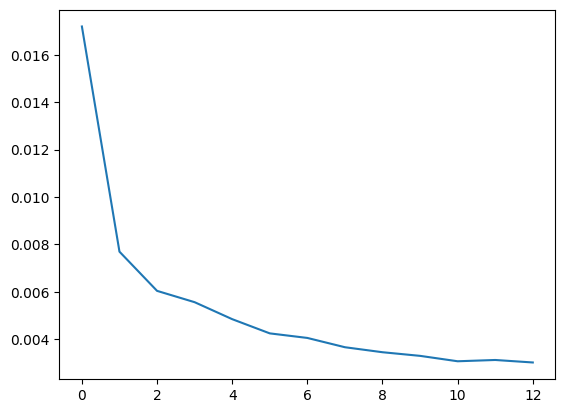

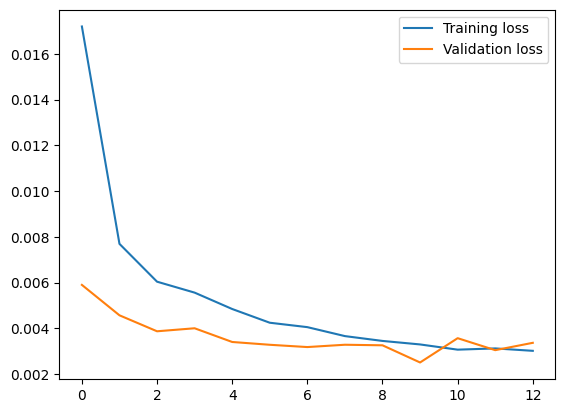

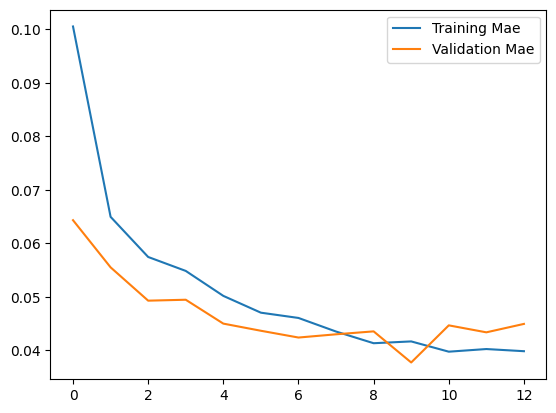

In [19]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

55/55 [==============================] - 1s 9ms/step


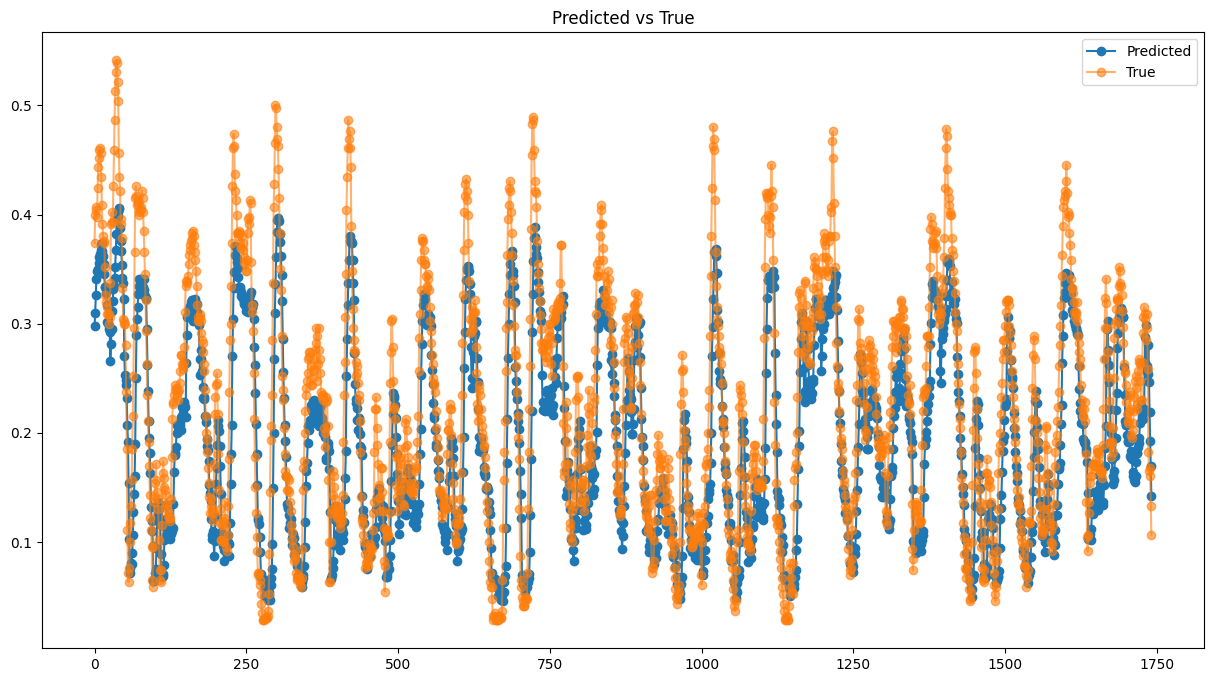

In [20]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [21]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.045444156949938225,
 'mse': 0.0605121471413797,
 'rmse': 0.0036617199516599873}

# Entrenamiento Vanilla LSTM sin dropout

In [22]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4864      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [23]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/'+paciente+'/vanilla_NO_dropout_balanceado.h5')

Epoch 1/50
74/74 [==============================] - 5s 34ms/step - loss: 0.0080 - mae: 0.0654 - mse: 0.0080 - val_loss: 0.0056 - val_mae: 0.0598 - val_mse: 0.0056
Epoch 2/50
74/74 [==============================] - 1s 20ms/step - loss: 0.0046 - mae: 0.0531 - mse: 0.0046 - val_loss: 0.0049 - val_mae: 0.0562 - val_mse: 0.0049
Epoch 3/50
74/74 [==============================] - 1s 14ms/step - loss: 0.0038 - mae: 0.0475 - mse: 0.0038 - val_loss: 0.0040 - val_mae: 0.0498 - val_mse: 0.0040
Epoch 4/50
74/74 [==============================] - 1s 18ms/step - loss: 0.0031 - mae: 0.0424 - mse: 0.0031 - val_loss: 0.0033 - val_mae: 0.0443 - val_mse: 0.0033
Epoch 5/50
74/74 [==============================] - 1s 15ms/step - loss: 0.0025 - mae: 0.0370 - mse: 0.0025 - val_loss: 0.0029 - val_mae: 0.0411 - val_mse: 0.0029
Epoch 6/50
74/74 [==============================] - 2s 25ms/step - loss: 0.0019 - mae: 0.0315 - mse: 0.0019 - val_loss: 0.0024 - val_mae: 0.0371 - val_mse: 0.0024
Epoch 7/50
74/74 [====

55/55 [==============================] - 0s 6ms/step - loss: 0.0014 - mae: 0.0277 - mse: 0.0014
test loss, test acc: [0.0014380483189597726, 0.027665307745337486, 0.0014380483189597726]


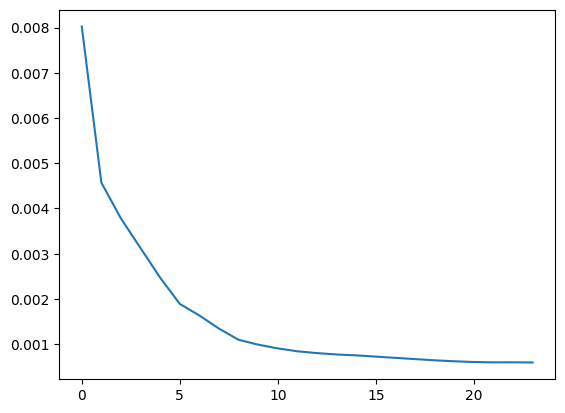

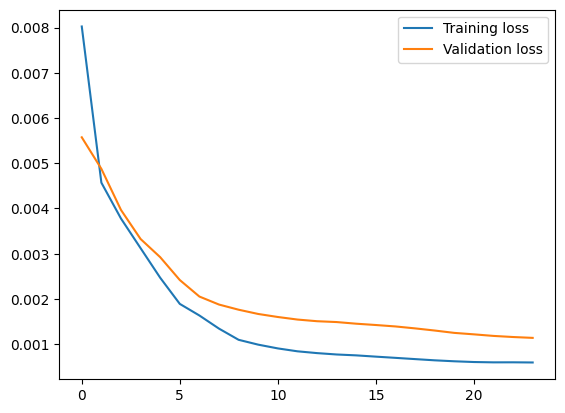

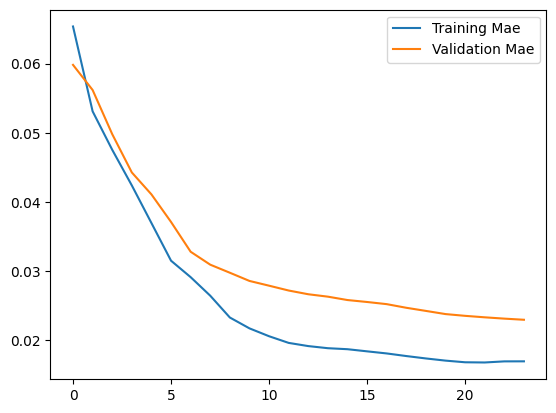

In [24]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

55/55 [==============================] - 1s 9ms/step


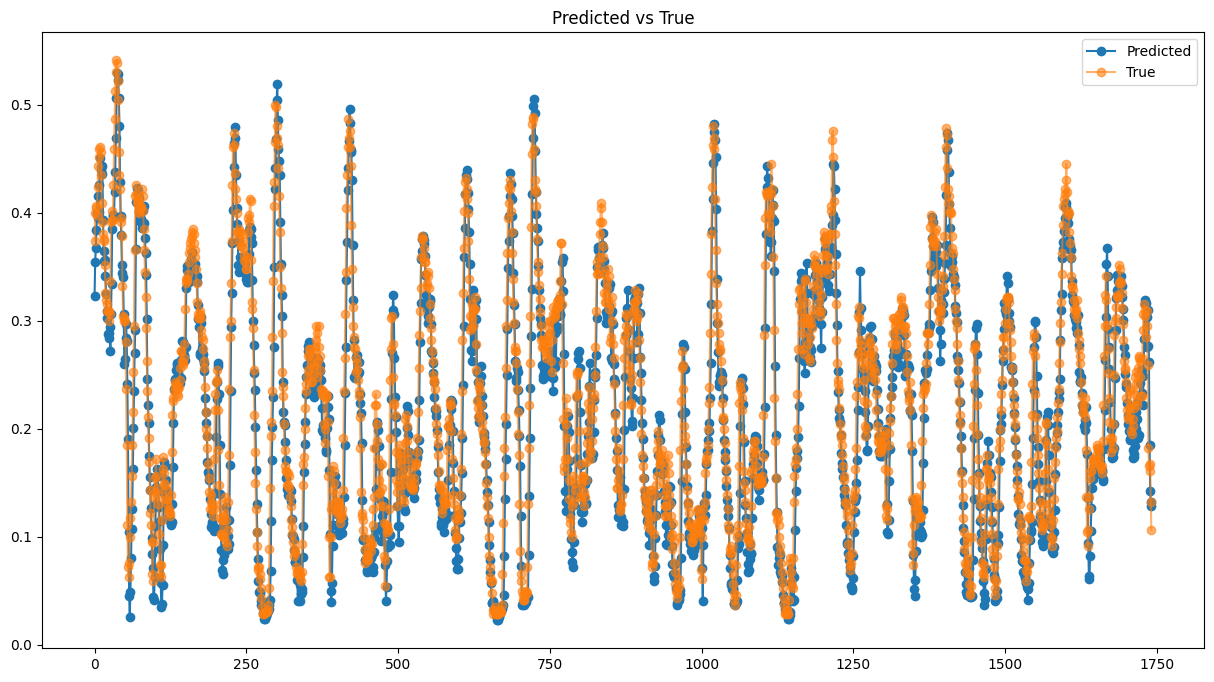

In [25]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [26]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.02766530784724416,
 'mse': 0.037921605629287085,
 'rmse': 0.0014380481735031777}

# Entrenamiento Stacked LSTM con dropout

In [27]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)               

In [28]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/'+paciente+'/stacked_dropout_balanceado.h5')

Epoch 1/50
74/74 [==============================] - 9s 58ms/step - loss: 0.0206 - mae: 0.1142 - mse: 0.0206 - val_loss: 0.0103 - val_mae: 0.0872 - val_mse: 0.0103
Epoch 2/50
74/74 [==============================] - 2s 31ms/step - loss: 0.0102 - mae: 0.0769 - mse: 0.0102 - val_loss: 0.0083 - val_mae: 0.0768 - val_mse: 0.0083
Epoch 3/50
74/74 [==============================] - 2s 33ms/step - loss: 0.0079 - mae: 0.0670 - mse: 0.0079 - val_loss: 0.0066 - val_mae: 0.0665 - val_mse: 0.0066
Epoch 4/50
74/74 [==============================] - 3s 46ms/step - loss: 0.0068 - mae: 0.0603 - mse: 0.0068 - val_loss: 0.0056 - val_mae: 0.0617 - val_mse: 0.0056
Epoch 5/50
74/74 [==============================] - 3s 45ms/step - loss: 0.0056 - mae: 0.0548 - mse: 0.0056 - val_loss: 0.0046 - val_mae: 0.0548 - val_mse: 0.0046
Epoch 6/50
74/74 [==============================] - 3s 46ms/step - loss: 0.0051 - mae: 0.0520 - mse: 0.0051 - val_loss: 0.0044 - val_mae: 0.0522 - val_mse: 0.0044
Epoch 7/50
74/74 [====

55/55 [==============================] - 1s 18ms/step - loss: 0.0027 - mae: 0.0402 - mse: 0.0027
test loss, test acc: [0.002703073900192976, 0.04016370326280594, 0.002703073900192976]


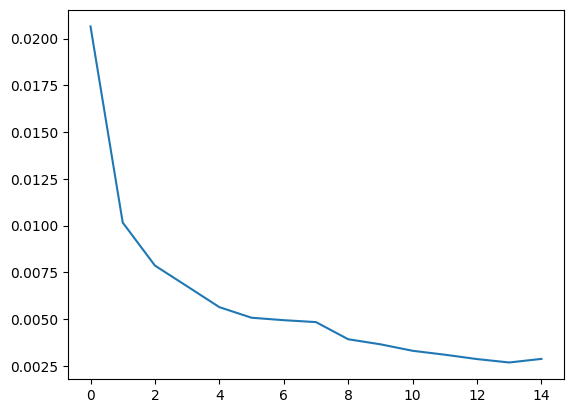

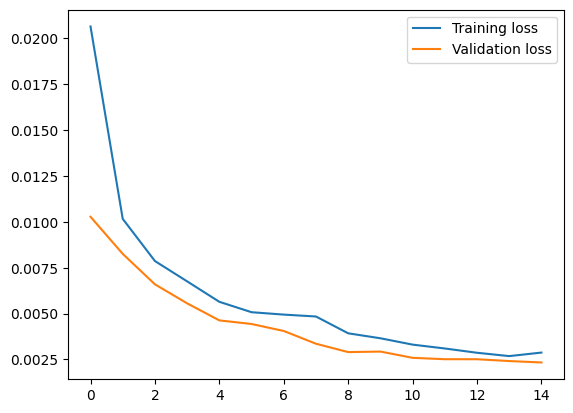

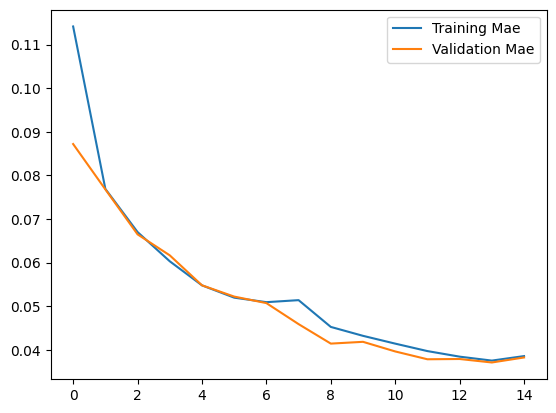

In [29]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

55/55 [==============================] - 2s 17ms/step


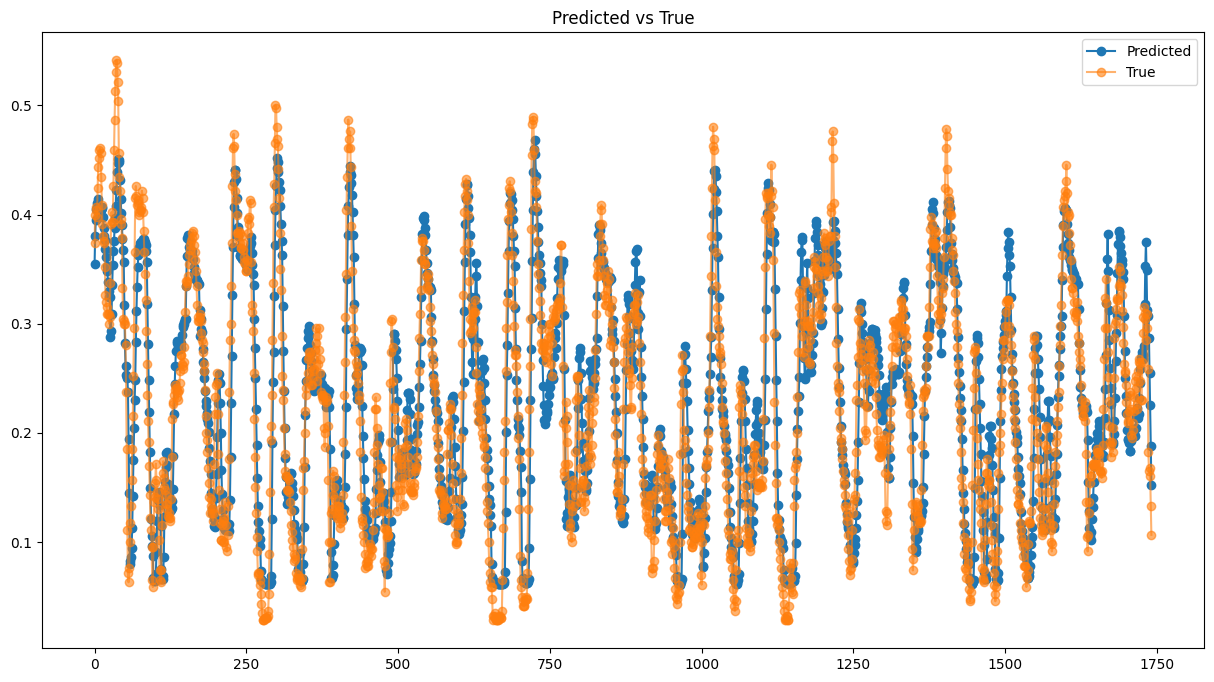

In [30]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [31]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.040163709044955594,
 'mse': 0.0519910943424051,
 'rmse': 0.0027030738909208673}

# Entrenamiento Stacked LSTM sin dropout

In [32]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________


In [33]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/'+paciente+'/stacked_NO_dropout_balanceado.h5')

Epoch 1/50
74/74 [==============================] - 7s 44ms/step - loss: 0.0133 - mae: 0.0893 - mse: 0.0133 - val_loss: 0.0127 - val_mae: 0.0956 - val_mse: 0.0127
Epoch 2/50
74/74 [==============================] - 3s 46ms/step - loss: 0.0066 - mae: 0.0621 - mse: 0.0066 - val_loss: 0.0076 - val_mae: 0.0730 - val_mse: 0.0076
Epoch 3/50
74/74 [==============================] - 3s 46ms/step - loss: 0.0046 - mae: 0.0500 - mse: 0.0046 - val_loss: 0.0054 - val_mae: 0.0599 - val_mse: 0.0054
Epoch 4/50
74/74 [==============================] - 3s 46ms/step - loss: 0.0041 - mae: 0.0472 - mse: 0.0041 - val_loss: 0.0046 - val_mae: 0.0560 - val_mse: 0.0046
Epoch 5/50
74/74 [==============================] - 2s 34ms/step - loss: 0.0032 - mae: 0.0413 - mse: 0.0032 - val_loss: 0.0041 - val_mae: 0.0524 - val_mse: 0.0041
Epoch 6/50
74/74 [==============================] - 2s 26ms/step - loss: 0.0030 - mae: 0.0402 - mse: 0.0030 - val_loss: 0.0034 - val_mae: 0.0469 - val_mse: 0.0034
Epoch 7/50
74/74 [====

55/55 [==============================] - 1s 11ms/step - loss: 0.0012 - mae: 0.0250 - mse: 0.0012
test loss, test acc: [0.0011806153925135732, 0.025000009685754776, 0.0011806153925135732]


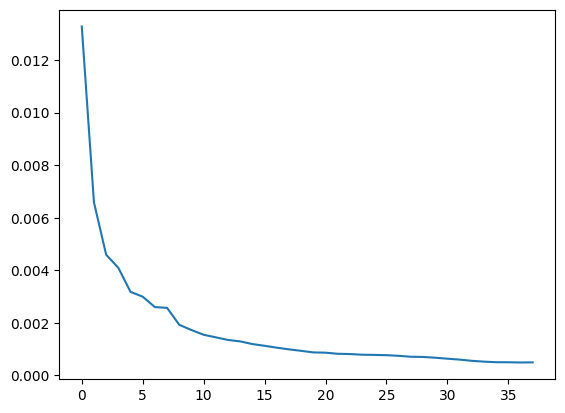

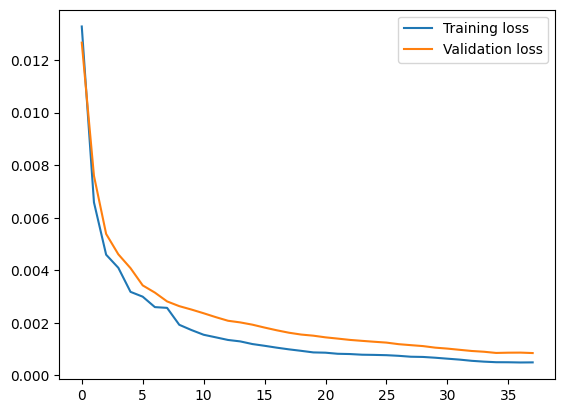

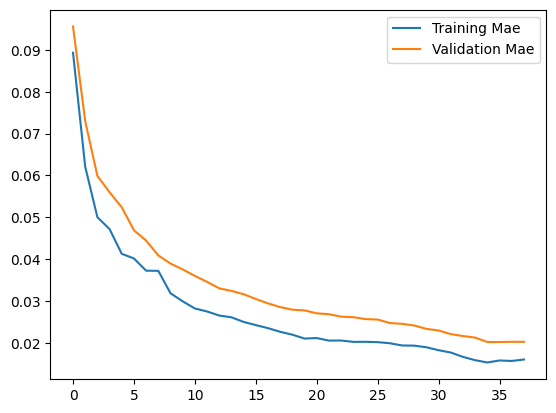

In [34]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

55/55 [==============================] - 1s 12ms/step


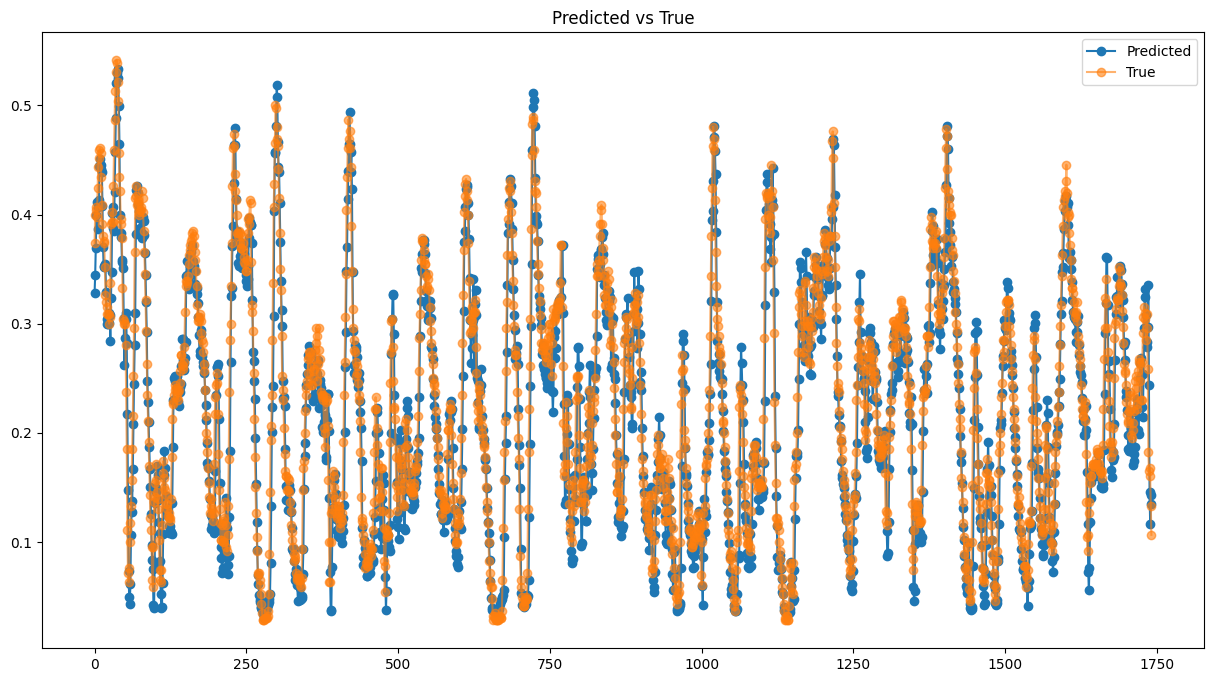

In [35]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [36]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.02500001381920174,
 'mse': 0.03436008299009863,
 'rmse': 0.0011806153030864653}

# Entrenamiento Bidirectional LSTM con dropout

In [37]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 64)               9728      
 l)                                                              
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                      

In [38]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/'+paciente+'/bidirectional_dropout_balanceado.h5')

Epoch 1/50
74/74 [==============================] - 8s 37ms/step - loss: 0.0184 - mae: 0.1033 - mse: 0.0184 - val_loss: 0.0073 - val_mae: 0.0736 - val_mse: 0.0073
Epoch 2/50
74/74 [==============================] - 2s 25ms/step - loss: 0.0086 - mae: 0.0710 - mse: 0.0086 - val_loss: 0.0052 - val_mae: 0.0595 - val_mse: 0.0052
Epoch 3/50
74/74 [==============================] - 2s 26ms/step - loss: 0.0071 - mae: 0.0633 - mse: 0.0071 - val_loss: 0.0047 - val_mae: 0.0554 - val_mse: 0.0047
Epoch 4/50
74/74 [==============================] - 2s 22ms/step - loss: 0.0062 - mae: 0.0587 - mse: 0.0062 - val_loss: 0.0042 - val_mae: 0.0521 - val_mse: 0.0042
Epoch 5/50
74/74 [==============================] - 1s 14ms/step - loss: 0.0054 - mae: 0.0542 - mse: 0.0054 - val_loss: 0.0036 - val_mae: 0.0476 - val_mse: 0.0036
Epoch 6/50
74/74 [==============================] - 1s 13ms/step - loss: 0.0049 - mae: 0.0520 - mse: 0.0049 - val_loss: 0.0033 - val_mae: 0.0446 - val_mse: 0.0033
Epoch 7/50
74/74 [====

55/55 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0374 - mse: 0.0025
test loss, test acc: [0.002547325100749731, 0.03737388923764229, 0.002547325100749731]


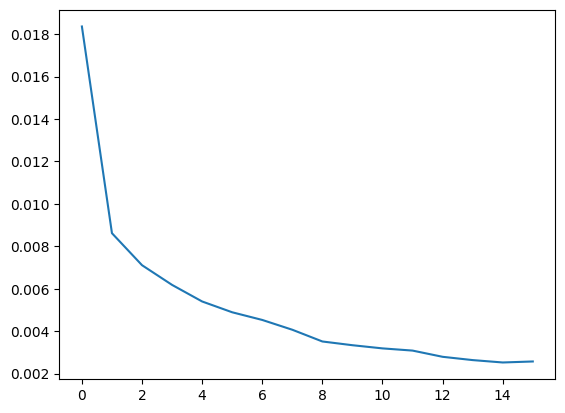

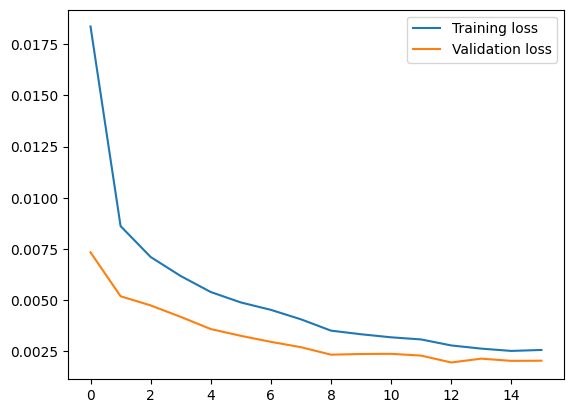

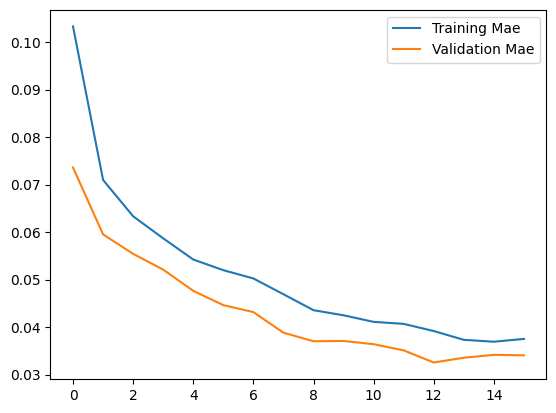

In [39]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

55/55 [==============================] - 1s 5ms/step


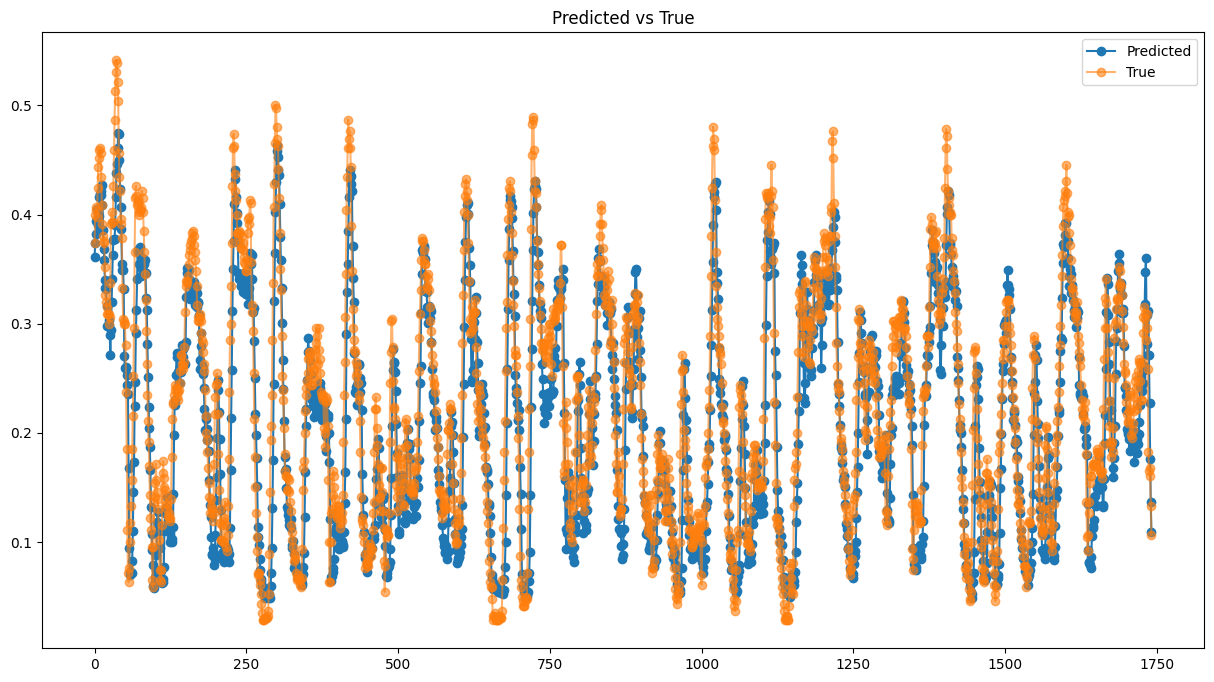

In [40]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [41]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.03737389501812576,
 'mse': 0.05047102902637739,
 'rmse': 0.0025473247709814286}

# Entrenamiento Bidirectional LSTM sin dropout

In [42]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 64)               9728      
 nal)                                                            
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,001
Trainable params: 16,001
Non-trainable params: 0
_________________________________________________________________


In [43]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/'+paciente+'/bidirectional_NO_dropout_balanceado.h5')

Epoch 1/50
74/74 [==============================] - 8s 36ms/step - loss: 0.0088 - mae: 0.0704 - mse: 0.0088 - val_loss: 0.0048 - val_mae: 0.0545 - val_mse: 0.0048
Epoch 2/50
74/74 [==============================] - 2s 25ms/step - loss: 0.0037 - mae: 0.0456 - mse: 0.0037 - val_loss: 0.0042 - val_mae: 0.0506 - val_mse: 0.0042
Epoch 3/50
74/74 [==============================] - 2s 25ms/step - loss: 0.0031 - mae: 0.0416 - mse: 0.0031 - val_loss: 0.0038 - val_mae: 0.0473 - val_mse: 0.0038
Epoch 4/50
74/74 [==============================] - 1s 15ms/step - loss: 0.0030 - mae: 0.0426 - mse: 0.0030 - val_loss: 0.0033 - val_mae: 0.0438 - val_mse: 0.0033
Epoch 5/50
74/74 [==============================] - 1s 13ms/step - loss: 0.0027 - mae: 0.0408 - mse: 0.0027 - val_loss: 0.0029 - val_mae: 0.0408 - val_mse: 0.0029
Epoch 6/50
74/74 [==============================] - 1s 14ms/step - loss: 0.0026 - mae: 0.0402 - mse: 0.0026 - val_loss: 0.0026 - val_mae: 0.0375 - val_mse: 0.0026
Epoch 7/50
74/74 [====

55/55 [==============================] - 1s 10ms/step - loss: 0.0016 - mae: 0.0301 - mse: 0.0016
test loss, test acc: [0.001557685318402946, 0.030070044100284576, 0.001557685318402946]


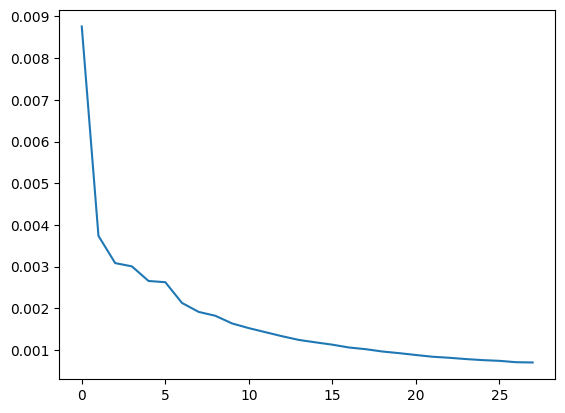

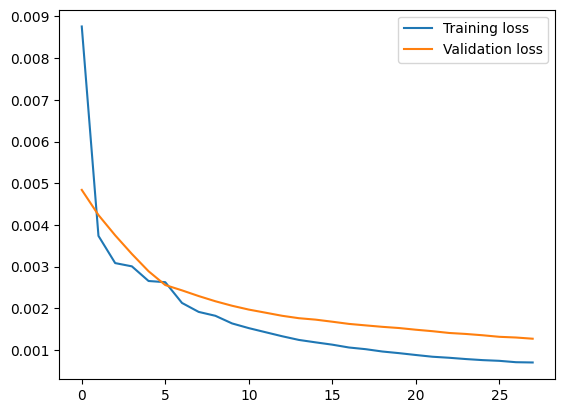

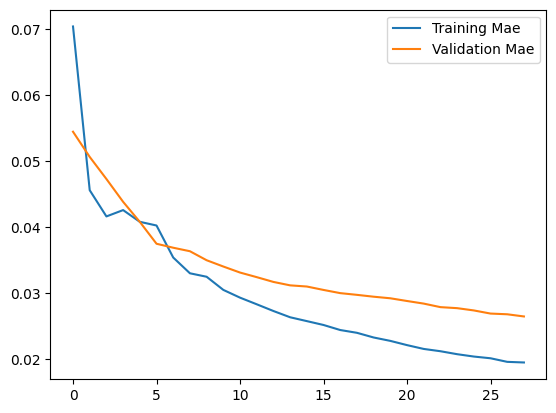

In [44]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

55/55 [==============================] - 1s 9ms/step


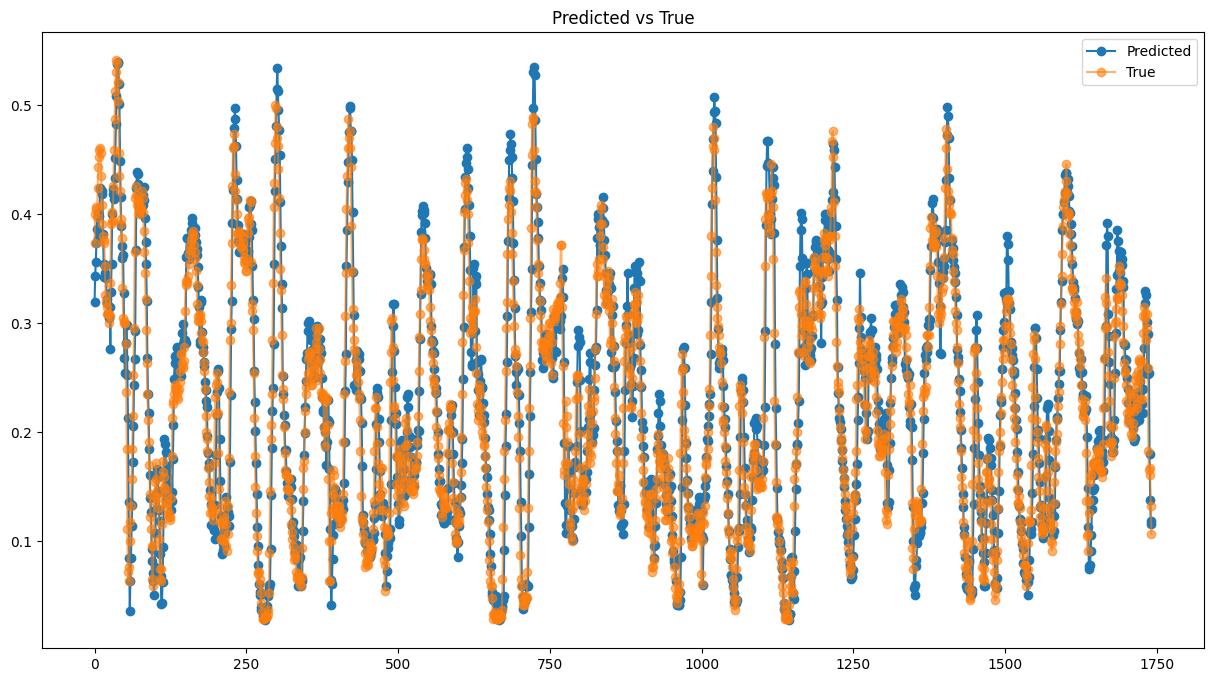

In [45]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [46]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.03007004220033632,
 'mse': 0.039467523780369614,
 'rmse': 0.0015576854333540409}